<a href="https://colab.research.google.com/github/Yoyo1505/Noriega-Zaldiavr-Jorge-Armando_INV_OPS/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELO EOQ PARA MÚLTIPLES ARTÍCULOS CON RESTRICCIÓN DE ALMACÉN
Basado en Taha, Investigación de Operaciones (7ª edición), Sección 11.2.3

1. Ejecutando ejemplo del libro (Taha 11.2-3):
EJEMPLO 11.2-3 - LIBRO DE TAHA (7ª edición)
MODEO EOQ MULTI-ITEM CON RESTRICCIÓN DE ALMACÉN

--- PASO 1: Calcular EOQ sin restricción ---
Artículo 1: Q_1 = 4472.14
Artículo 2: Q_2 = 3098.39
Artículo 3: Q_3 = 4743.42

Costo total (sin restricción): $2015.57
Espacio utilizado: 6156.97 (Disponible: 15000)

--- PASO 2: Verificar restricción de espacio ---
✓ La solución EOQ satisface la restricción.
  Espacio utilizado: 6156.97 <= 15000

Solución óptima encontrada en el Paso 1.


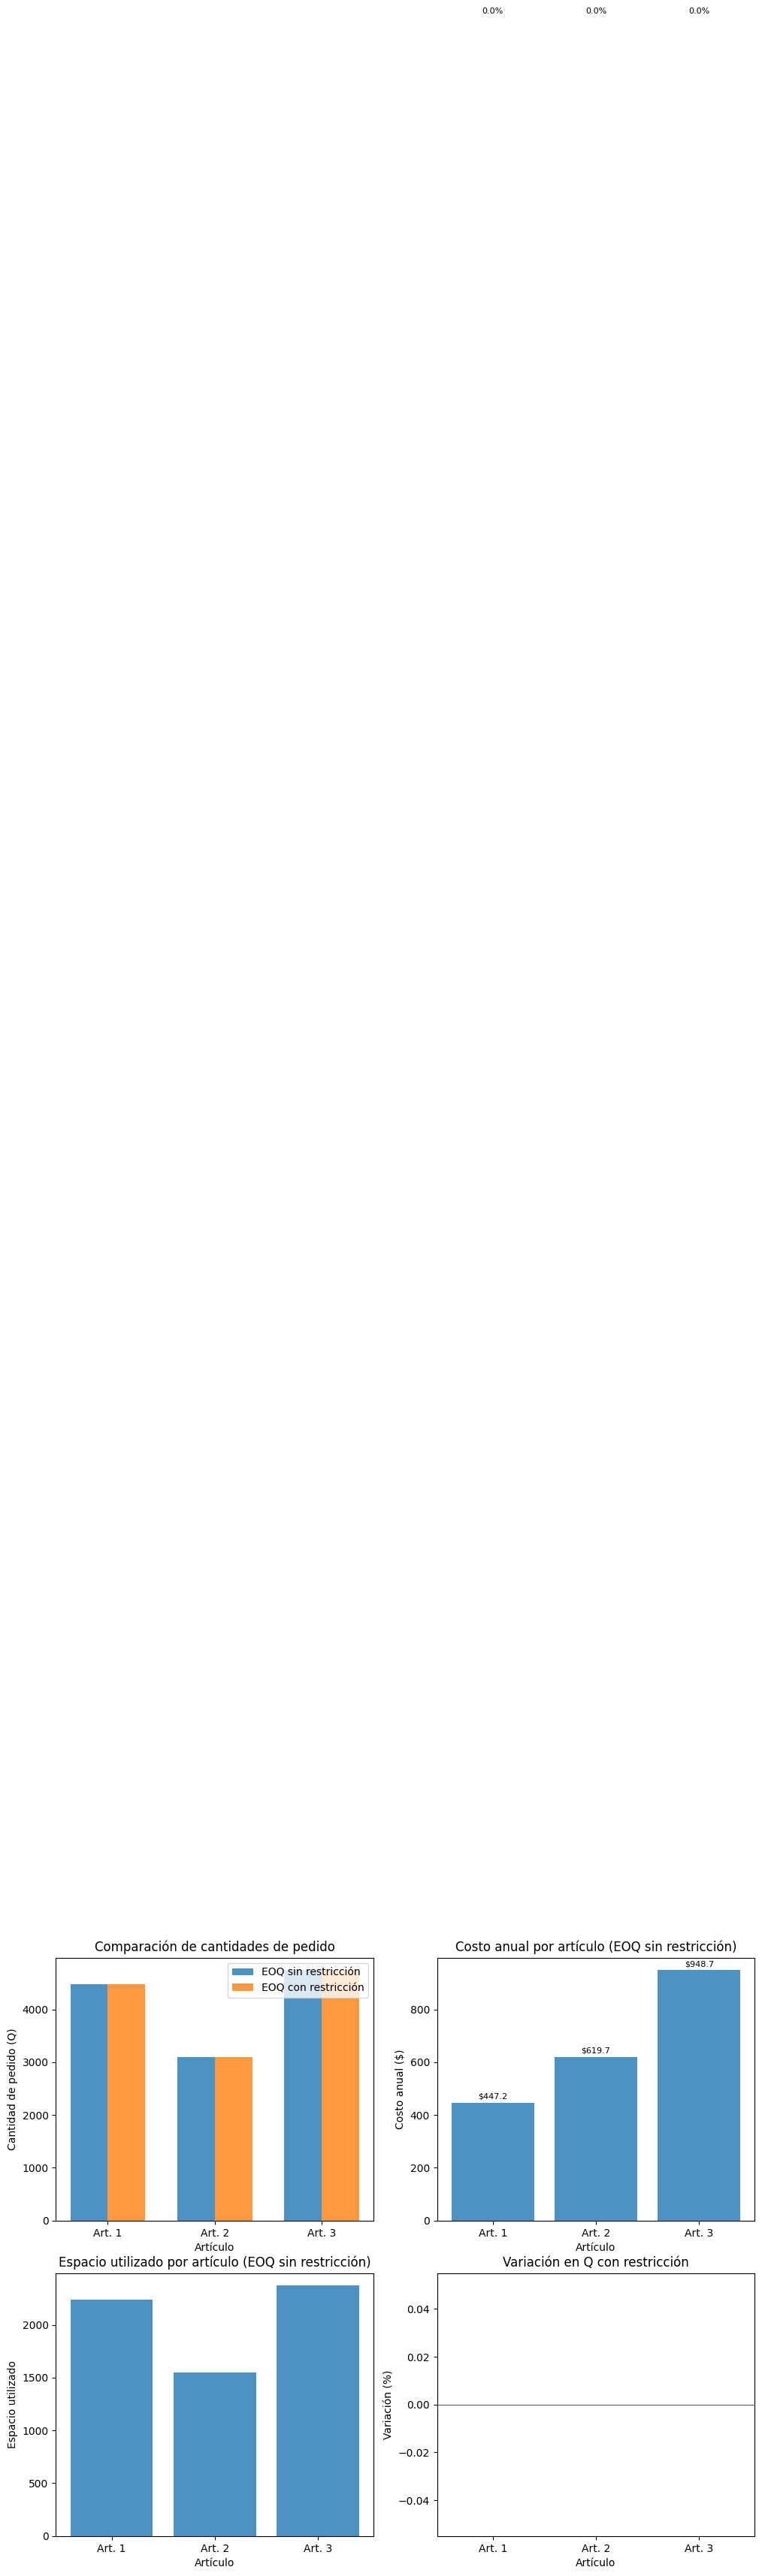


--- ANÁLISIS DE SENSIBILIDAD ---
Variando el espacio disponible (A):


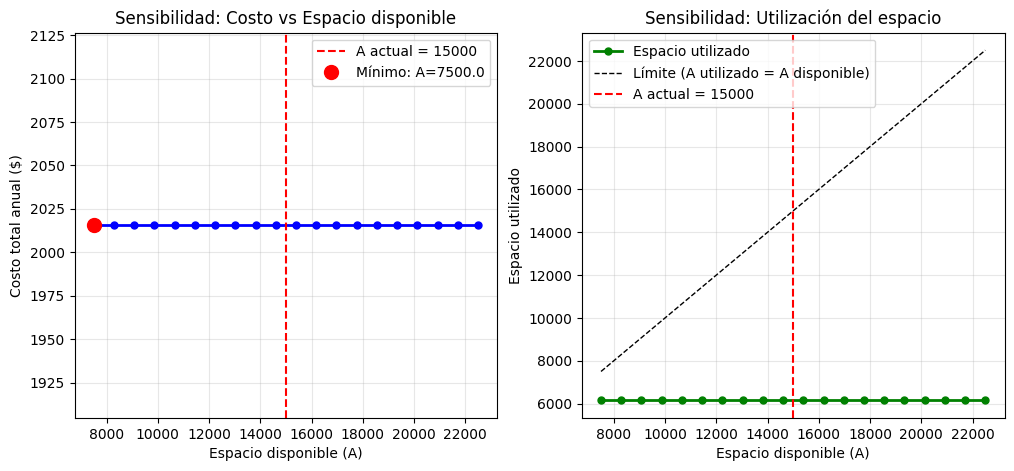



¿Desea probar con sus propios datos? (s/n): s

ENTRADA DE DATOS PERSONALIZADOS
Número de artículos: 3

Ingrese datos para cada artículo:

--- Artículo 1 ---
  Demanda anual (D_1): 56000
  Costo de preparación (K_1): 116000
  Costo de mantener (h_1): 56000
  Espacio por unidad (a_1): 1

--- Artículo 2 ---
  Demanda anual (D_2): 33000
  Costo de preparación (K_2): 66000
  Costo de mantener (h_2): 33000
  Espacio por unidad (a_2): 1

--- Artículo 3 ---
  Demanda anual (D_3): 12000
  Costo de preparación (K_3): 24000
  Costo de mantener (h_3): 12000
  Espacio por unidad (a_3): 2

Espacio total disponible en almacén (A): 110
MODEO EOQ MULTI-ITEM CON RESTRICCIÓN DE ALMACÉN

--- PASO 1: Calcular EOQ sin restricción ---
Artículo 1: Q_1 = 481.66
Artículo 2: Q_2 = 363.32
Artículo 3: Q_3 = 219.09

Costo total (sin restricción): $41591735.53
Espacio utilizado: 641.58 (Disponible: 110.0)

--- PASO 2: Verificar restricción de espacio ---
✗ La solución EOQ NO satisface la restricción.
  Espacio uti

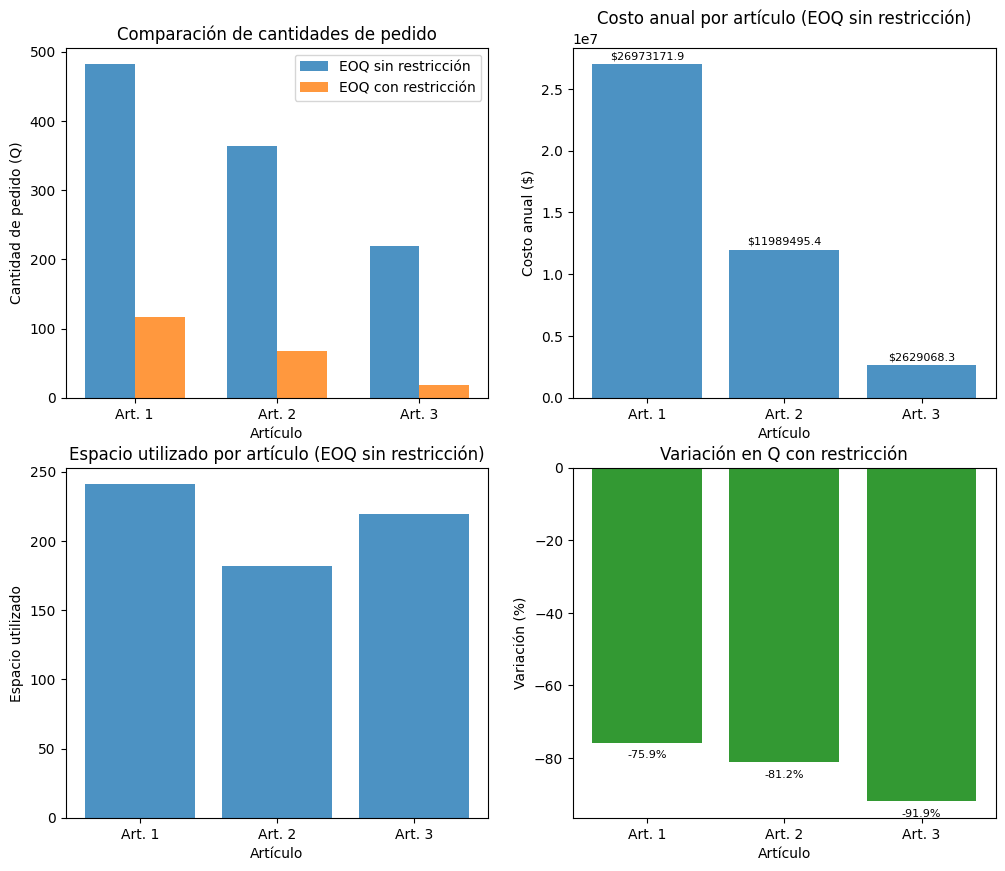


¿Desea realizar análisis de sensibilidad? (s/n): s

--- ANÁLISIS DE SENSIBILIDAD ---
Variando el espacio disponible (A):
No se encontró solución con el método simbólico. Usando optimización numérica.
No se encontró solución con el método simbólico. Usando optimización numérica.
No se encontró solución con el método simbólico. Usando optimización numérica.
Advertencia: Optimización no convergió completamente. Mensaje: Positive directional derivative for linesearch
No se encontró solución con el método simbólico. Usando optimización numérica.
No se encontró solución con el método simbólico. Usando optimización numérica.
No se encontró solución con el método simbólico. Usando optimización numérica.
No se encontró solución con el método simbólico. Usando optimización numérica.
Advertencia: Optimización no convergió completamente. Mensaje: Positive directional derivative for linesearch
No se encontró solución con el método simbólico. Usando optimización numérica.
Advertencia: Optimización 

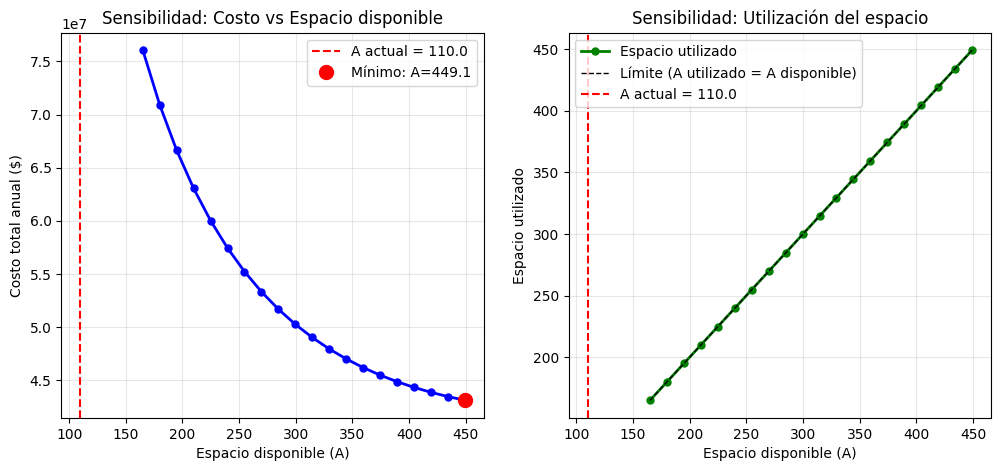


FIN DEL PROGRAMA


In [5]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

class EOQMultiItemConstrained:
    """
    Implementación del modelo EOQ para múltiples artículos con restricción de espacio
    Basado en la Sección 11.2.3 del libro de Taha (7ª edición)
    """

    def __init__(self, D, K, h, a, A):
        """
        Inicializa el modelo con los parámetros dados

        Parámetros:
        -----------
        D : array-like, demanda anual para cada artículo
        K : array-like, costo de preparación por pedido para cada artículo
        h : array-like, costo de mantener por unidad por año para cada artículo
        a : array-like, espacio requerido por unidad para cada artículo
        A : float, espacio total disponible en el almacén
        """
        self.D = np.array(D)
        self.K = np.array(K)
        self.h = np.array(h)
        self.a = np.array(a)
        self.A = A
        self.n = len(D)  # Número de artículos

        # Verificar que todos los arrays tengan la misma longitud
        assert len(D) == len(K) == len(h) == len(a), "Todos los parámetros deben tener la misma longitud"

    def paso1_eoq_sin_restriccion(self):
        """Paso 1: Calcular EOQ sin considerar la restricción"""
        # Fórmula EOQ clásica: Q_i = sqrt(2*D_i*K_i / h_i)
        Q_eoq = np.sqrt(2 * self.D * self.K / self.h)
        return Q_eoq

    def paso2_verificar_restriccion(self, Q):
        """Paso 2: Verificar si la solución satisface la restricción de espacio"""
        espacio_total = np.sum(self.a * Q / 2)
        return espacio_total <= self.A, espacio_total

    def paso3_resolver_con_restriccion(self):
        """Paso 3: Resolver el problema con restricción usando multiplicadores de Lagrange"""

        # Definir variables simbólicas
        Q_vars = [sp.symbols(f'Q{i}') for i in range(self.n)]
        λ = sp.symbols('λ')

        # Función objetivo (costo total)
        TC = sum(self.D[i] * self.K[i] / Q_vars[i] + self.h[i] * Q_vars[i] / 2
                 for i in range(self.n))

        # Restricción: sum(a_i * Q_i / 2) - A <= 0
        restriccion = sum(self.a[i] * Q_vars[i] / 2 for i in range(self.n)) - self.A

        # Lagrangiano: L = TC + λ * restriccion
        L = TC + λ * restriccion

        # Derivadas parciales
        ecuaciones = []
        for i in range(self.n):
            ecuaciones.append(sp.diff(L, Q_vars[i]))
        ecuaciones.append(restriccion)  # Derivada respecto a λ es la restricción

        # Resolver sistema de ecuaciones
        soluciones = sp.solve(ecuaciones, Q_vars + [λ], dict=True)

        if not soluciones:
            print("No se encontró solución con el método simbólico. Usando optimización numérica.")
            return self.resolver_numericamente()

        # Filtrar soluciones positivas
        soluciones_positivas = []
        for sol in soluciones:
            if all(sol[Q_vars[i]] > 0 for i in range(self.n)):
                soluciones_positivas.append(sol)

        if not soluciones_positivas:
            print("No se encontraron soluciones positivas. Usando optimización numérica.")
            return self.resolver_numericamente()

        # Seleccionar la solución con λ >= 0 (condición de optimalidad)
        solucion_final = None
        for sol in soluciones_positivas:
            if sol[λ] >= 0:
                solucion_final = sol
                break

        if solucion_final is None:
            print("No se encontró solución con λ >= 0. Usando optimización numérica.")
            return self.resolver_numericamente()

        # Extraer valores de Q
        Q_opt = np.array([float(solucion_final[Q_vars[i]]) for i in range(self.n)])
        λ_opt = float(solucion_final[λ])

        return Q_opt, λ_opt

    def resolver_numericamente(self):
        """Resuelve el problema usando optimización numérica (Scipy)"""

        # Función objetivo
        def costo_total(Q):
            return np.sum(self.D * self.K / Q + self.h * Q / 2)

        # Restricción: sum(a_i * Q_i / 2) - A <= 0
        def restriccion_espacio(Q):
            return self.A - np.sum(self.a * Q / 2)

        # Restricciones de no negatividad
        bounds = [(1e-6, None) for _ in range(self.n)]  # Q_i >= 0 (usamos valor pequeño positivo)

        # Punto inicial: EOQ sin restricción
        Q0 = self.paso1_eoq_sin_restriccion()

        # Configurar restricciones
        constraints = [
            {'type': 'ineq', 'fun': restriccion_espacio}  # g(x) >= 0 (A - sum(...) >= 0)
        ]

        # Resolver
        result = minimize(costo_total, Q0, bounds=bounds, constraints=constraints,
                         method='SLSQP', options={'maxiter': 1000, 'ftol': 1e-8})

        if not result.success:
            print(f"Advertencia: Optimización no convergió completamente. Mensaje: {result.message}")

        return result.x, result.fun

    def resolver(self):
        """Ejecuta los 3 pasos del método"""

        print("="*60)
        print("MODEO EOQ MULTI-ITEM CON RESTRICCIÓN DE ALMACÉN")
        print("="*60)

        # Paso 1: EOQ sin restricción
        print("\n--- PASO 1: Calcular EOQ sin restricción ---")
        Q_eoq = self.paso1_eoq_sin_restriccion()
        costo_eoq = np.sum(self.D * self.K / Q_eoq + self.h * Q_eoq / 2)
        espacio_eoq = np.sum(self.a * Q_eoq / 2)

        for i in range(self.n):
            print(f"Artículo {i+1}: Q_{i+1} = {Q_eoq[i]:.2f}")
        print(f"\nCosto total (sin restricción): ${costo_eoq:.2f}")
        print(f"Espacio utilizado: {espacio_eoq:.2f} (Disponible: {self.A})")

        # Paso 2: Verificar restricción
        print("\n--- PASO 2: Verificar restricción de espacio ---")
        satisface, espacio = self.paso2_verificar_restriccion(Q_eoq)

        if satisface:
            print(f"✓ La solución EOQ satisface la restricción.")
            print(f"  Espacio utilizado: {espacio:.2f} <= {self.A}")
            print("\nSolución óptima encontrada en el Paso 1.")
            return Q_eoq, costo_eoq
        else:
            print(f"✗ La solución EOQ NO satisface la restricción.")
            print(f"  Espacio utilizado: {espacio:.2f} > {self.A}")
            print("  Se procede al Paso 3...")

            # Paso 3: Resolver con restricción
            print("\n--- PASO 3: Resolver con restricción usando método de Lagrange ---")
            Q_opt, λ_opt = self.paso3_resolver_con_restriccion()
            costo_opt = np.sum(self.D * self.K / Q_opt + self.h * Q_opt / 2)
            espacio_opt = np.sum(self.a * Q_opt / 2)

            print("\nSolución óptima con restricción:")
            for i in range(self.n):
                print(f"Artículo {i+1}: Q_{i+1} = {Q_opt[i]:.2f}")
            print(f"\nMultiplicador de Lagrange (λ): {λ_opt:.6f}")
            print(f"Costo total (con restricción): ${costo_opt:.2f}")
            print(f"Espacio utilizado: {espacio_opt:.2f} (Disponible: {self.A})")

            # Comparación
            print("\n--- COMPARACIÓN ---")
            print(f"Costo EOQ sin restricción: ${costo_eoq:.2f}")
            print(f"Costo EOQ con restricción: ${costo_opt:.2f}")
            print(f"Incremento en costo: ${costo_opt - costo_eoq:.2f} ({100*(costo_opt/costo_eoq - 1):.2f}%)")

            return Q_opt, costo_opt

    def visualizar_resultados(self, Q_eoq, Q_opt=None):
        """Visualiza comparación entre EOQ sin y con restricción"""

        fig, axes = plt.subplots(2, 2, figsize=(12, 10))

        # Gráfico 1: Comparación de cantidades de pedido
        x = np.arange(self.n)
        width = 0.35

        ax1 = axes[0, 0]
        if Q_opt is not None:
            bars1 = ax1.bar(x - width/2, Q_eoq, width, label='EOQ sin restricción', alpha=0.8)
            bars2 = ax1.bar(x + width/2, Q_opt, width, label='EOQ con restricción', alpha=0.8)
            ax1.legend()
        else:
            bars1 = ax1.bar(x, Q_eoq, width, label='EOQ', alpha=0.8)

        ax1.set_xlabel('Artículo')
        ax1.set_ylabel('Cantidad de pedido (Q)')
        ax1.set_title('Comparación de cantidades de pedido')
        ax1.set_xticks(x)
        ax1.set_xticklabels([f'Art. {i+1}' for i in range(self.n)])

        # Gráfico 2: Costos individuales
        ax2 = axes[0, 1]
        costos_eoq = self.D * self.K / Q_eoq + self.h * Q_eoq / 2

        bars = ax2.bar(x, costos_eoq, alpha=0.8)
        ax2.set_xlabel('Artículo')
        ax2.set_ylabel('Costo anual ($)')
        ax2.set_title('Costo anual por artículo (EOQ sin restricción)')
        ax2.set_xticks(x)
        ax2.set_xticklabels([f'Art. {i+1}' for i in range(self.n)])

        # Añadir valores en las barras
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + max(costos_eoq)*0.01,
                    f'${height:.1f}', ha='center', va='bottom', fontsize=8)

        # Gráfico 3: Espacio utilizado por artículo
        ax3 = axes[1, 0]
        espacio_eoq = self.a * Q_eoq / 2

        bars = ax3.bar(x, espacio_eoq, alpha=0.8)
        ax3.set_xlabel('Artículo')
        ax3.set_ylabel('Espacio utilizado')
        ax3.set_title('Espacio utilizado por artículo (EOQ sin restricción)')
        ax3.set_xticks(x)
        ax3.set_xticklabels([f'Art. {i+1}' for i in range(self.n)])

        # Línea de espacio disponible
        if Q_opt is None:
            espacio_total = np.sum(espacio_eoq)
            if espacio_total > self.A:
                ax3.axhline(y=self.A, color='r', linestyle='--', label=f'Límite: {self.A}')
                ax3.legend()

        # Gráfico 4: Sensibilidad (solo si tenemos Q_opt)
        if Q_opt is not None:
            ax4 = axes[1, 1]
            variacion = 100 * (Q_opt / Q_eoq - 1)
            colors = ['green' if v <= 0 else 'red' for v in variacion]

            bars = ax4.bar(x, variacion, color=colors, alpha=0.8)
            ax4.set_xlabel('Artículo')
            ax4.set_ylabel('Variación (%)')
            ax4.set_title('Variación en Q con restricción')
            ax4.set_xticks(x)
            ax4.set_xticklabels([f'Art. {i+1}' for i in range(self.n)])
            ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

            # Añadir valores en las barras
            for bar in bars:
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2.,
                        height + (1 if height >= 0 else -2),
                        f'{height:.1f}%', ha='center', va='bottom' if height >= 0 else 'top',
                        fontsize=8)


        plt.show()

    def analisis_sensibilidad(self, A_range=None):
        """Analiza sensibilidad del costo total respecto al espacio disponible"""

        if A_range is None:
            # Rango de valores de A alrededor del valor actual
            A_min = max(0.5 * self.A, np.sum(self.a * np.sqrt(2 * self.D * self.K / self.h) / 2) * 0.7)
            A_max = 1.5 * self.A
            A_range = np.linspace(A_min, A_max, 20)

        costos = []
        espacios_utilizados = []

        print("\n--- ANÁLISIS DE SENSIBILIDAD ---")
        print("Variando el espacio disponible (A):")

        for A_val in A_range:
            # Crear nuevo modelo con A diferente
            modelo_temp = EOQMultiItemConstrained(self.D, self.K, self.h, self.a, A_val)

            # Resolver
            Q_eoq = modelo_temp.paso1_eoq_sin_restriccion()
            satisface, espacio = modelo_temp.paso2_verificar_restriccion(Q_eoq)

            if satisface:
                costo = np.sum(self.D * self.K / Q_eoq + self.h * Q_eoq / 2)
            else:
                Q_opt, _ = modelo_temp.paso3_resolver_con_restriccion()
                costo = np.sum(self.D * self.K / Q_opt + self.h * Q_opt / 2)
                espacio = np.sum(self.a * Q_opt / 2)

            costos.append(costo)
            espacios_utilizados.append(espacio)

        # Gráfico de sensibilidad
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        # Gráfico 1: Costo vs Espacio disponible
        ax[0].plot(A_range, costos, 'b-o', linewidth=2, markersize=5)
        ax[0].axvline(x=self.A, color='r', linestyle='--', label=f'A actual = {self.A}')
        ax[0].set_xlabel('Espacio disponible (A)')
        ax[0].set_ylabel('Costo total anual ($)')
        ax[0].set_title('Sensibilidad: Costo vs Espacio disponible')
        ax[0].grid(True, alpha=0.3)
        ax[0].legend()

        # Marcar punto óptimo (costo mínimo)
        idx_min = np.argmin(costos)
        ax[0].plot(A_range[idx_min], costos[idx_min], 'ro', markersize=10,
                  label=f'Mínimo: A={A_range[idx_min]:.1f}')
        ax[0].legend()

        # Gráfico 2: Espacio utilizado vs Espacio disponible
        ax[1].plot(A_range, espacios_utilizados, 'g-o', linewidth=2, markersize=5, label='Espacio utilizado')
        ax[1].plot(A_range, A_range, 'k--', linewidth=1, label='Límite (A utilizado = A disponible)')
        ax[1].axvline(x=self.A, color='r', linestyle='--', label=f'A actual = {self.A}')
        ax[1].set_xlabel('Espacio disponible (A)')
        ax[1].set_ylabel('Espacio utilizado')
        ax[1].set_title('Sensibilidad: Utilización del espacio')
        ax[1].grid(True, alpha=0.3)
        ax[1].legend()
        plt.show()

        return A_range, costos, espacios_utilizados

# ============================================================================
# EJEMPLO 11.2-3 DEL LIBRO DE TAHA (7ª edición)
# ============================================================================

def ejemplo_taha_11_2_3():
    """Implementa el Ejemplo 11.2-3 del libro de Taha"""

    print("="*60)
    print("EJEMPLO 11.2-3 - LIBRO DE TAHA (7ª edición)")
    print("="*60)

    # Parámetros del ejemplo (3 artículos)
    # D: Demanda anual (unidades/año)
    D = [10000, 8000, 15000]

    # K: Costo de preparación ($/pedido)
    K = [100, 120, 150]

    # h: Costo de mantener ($/unidad/año)
    h = [0.1, 0.2, 0.2]

    # a: Espacio requerido por unidad (pies³/unidad)
    a = [1, 1, 1]  # En el ejemplo todos requieren 1 pie³ por unidad

    # A: Espacio total disponible (pies³)
    A = 15000  # En el ejemplo, A = 15000 pies³

    # Crear y resolver modelo
    modelo = EOQMultiItemConstrained(D, K, h, a, A)

    # Resolver
    Q_opt, costo_opt = modelo.resolver()

    # Visualizar resultados
    Q_eoq = modelo.paso1_eoq_sin_restriccion()
    modelo.visualizar_resultados(Q_eoq, Q_opt)

    # Análisis de sensibilidad
    modelo.analisis_sensibilidad()

    return modelo, Q_opt, costo_opt

# ============================================================================
# FUNCIÓN PRINCIPAL
# ============================================================================

def main():
    """Función principal que ejecuta el ejemplo y permite probar con otros datos"""

    print("MODELO EOQ PARA MÚLTIPLES ARTÍCULOS CON RESTRICCIÓN DE ALMACÉN")
    print("Basado en Taha, Investigación de Operaciones (7ª edición), Sección 11.2.3\n")

    # Ejecutar ejemplo del libro
    print("1. Ejecutando ejemplo del libro (Taha 11.2-3):")
    modelo_ejemplo, Q_opt, costo_opt = ejemplo_taha_11_2_3()

    # Opción para probar con datos personalizados
    print("\n" + "="*60)
    respuesta = input("\n¿Desea probar con sus propios datos? (s/n): ").strip().lower()

    if respuesta == 's':
        print("\n" + "="*60)
        print("ENTRADA DE DATOS PERSONALIZADOS")
        print("="*60)

        try:
            # Solicitar número de artículos
            n = int(input("Número de artículos: "))

            # Inicializar listas
            D_list, K_list, h_list, a_list = [], [], [], []

            # Solicitar datos para cada artículo
            print("\nIngrese datos para cada artículo:")
            for i in range(n):
                print(f"\n--- Artículo {i+1} ---")
                D = float(input(f"  Demanda anual (D_{i+1}): "))
                K = float(input(f"  Costo de preparación (K_{i+1}): "))
                h = float(input(f"  Costo de mantener (h_{i+1}): "))
                a = float(input(f"  Espacio por unidad (a_{i+1}): "))

                D_list.append(D)
                K_list.append(K)
                h_list.append(h)
                a_list.append(a)

            # Solicitar espacio total disponible
            A = float(input(f"\nEspacio total disponible en almacén (A): "))

            # Crear y resolver modelo
            modelo_personal = EOQMultiItemConstrained(D_list, K_list, h_list, a_list, A)
            Q_opt_personal, costo_opt_personal = modelo_personal.resolver()

            # Visualizar resultados
            Q_eoq_personal = modelo_personal.paso1_eoq_sin_restriccion()
            modelo_personal.visualizar_resultados(Q_eoq_personal, Q_opt_personal)

            # Análisis de sensibilidad opcional
            resp_sens = input("\n¿Desea realizar análisis de sensibilidad? (s/n): ").strip().lower()
            if resp_sens == 's':
                modelo_personal.analisis_sensibilidad()

        except ValueError:
            print("Error: Por favor ingrese valores numéricos válidos.")
        except Exception as e:
            print(f"Error inesperado: {e}")

    print("\n" + "="*60)
    print("FIN DEL PROGRAMA")
    print("="*60)

# Ejecutar la función principal
if __name__ == "__main__":
    main()